# Exercise 1

In [169]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
imgs = olivetti.images
labels = olivetti.target

X = imgs.reshape((400, 4096)).transpose()
X.shape

(4096, 400)

In [170]:
from matplotlib import pyplot as plt
import numpy as np

# set random seed
np.random.seed(42)

## 1.1

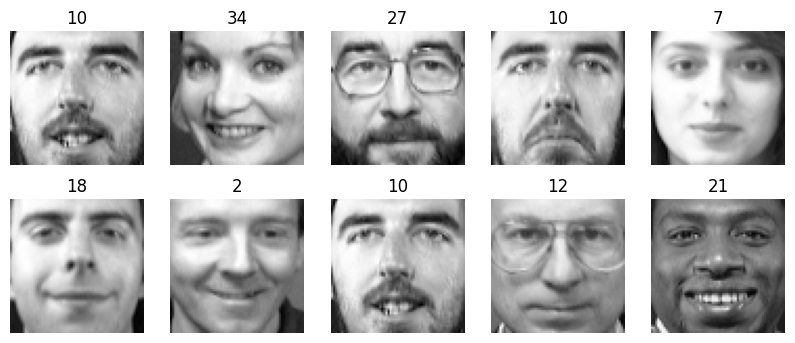

In [171]:
# 1. Visualize 10 randomly selected pictures with the corresponding labels.

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    rand_idx = np.random.randint(0, X.shape[1])
    ax.imshow(imgs[rand_idx], cmap='gray')
    ax.set_title(labels[rand_idx])
    ax.axis('off')

## 1.2

Text(0.5, 1.0, 'Average face')

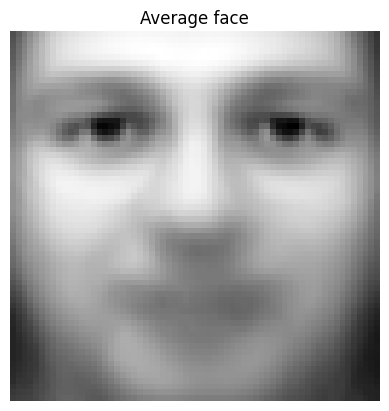

In [172]:
# 2. Compute and visualize the average of the images.
X_mean = X.mean(axis=1)

plt.imshow(X_mean.reshape(64, 64), cmap='gray')
plt.axis('off')
plt.title('Average face')


## 1.3

In [173]:
# 3. Perform SVD by first setting the attribute full_matrices = True and then full_matrices = False. Comment the results.

# Full matrices True
import time

start = time.time()
U_f, s_f, Vt_f = np.linalg.svd(X, full_matrices=True)

print('Time elapsed: {:.2f} seconds'.format(time.time() - start))

Time elapsed: 2.71 seconds


In [174]:
start = time.time()
U, s, Vt = np.linalg.svd(X, full_matrices=False)

print('Time elapsed: {:.2f} seconds'.format(time.time() - start))

Time elapsed: 0.32 seconds


In [175]:
np.all(s_f == s)

True

### 1.3 Comment

As expected, performing the economy SVD is much faster (in this case, it was around 8x faster). This significant difference in time can be attributed to the amount of computation required in both cases. When `full_matrices=True`, the operation computes the full $U$ and $V$ matrices. This is computationally expensive, especially for large matrices. On the other hand, with `full_matrices=False`, the operation computes the reduced form, where $U$ is $m \times k$ and $V$ is $n \times k$, where $k$ is the rank of the matrix $X$. This reduced form is much less computationally intensive, leading to faster computation times.

The fact that `np.all(s_f == s)` returns `True` confirms that the singular values remain the same regardless of the `full_matrices` parameter; only the $U$ and $V$ matrices are affected in terms of their dimensions. As such, for applications where only the singular values are of interest, we can set `full_matrices=False` for a significant performance benefit.


## 1.4

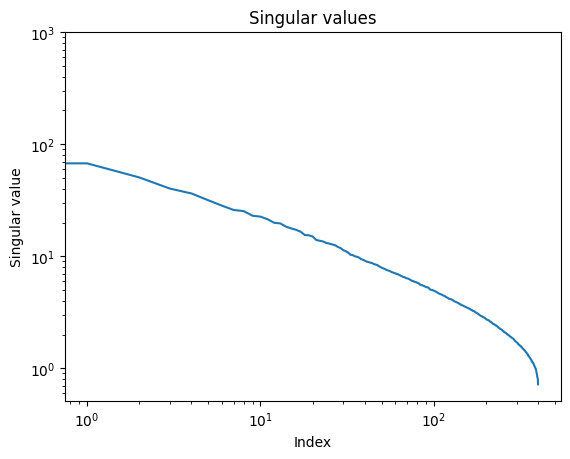

In [176]:
# 4. Plot the trend of the singular values and the fraction of "explained variance".

# trend of the singular values
plt.loglog(s)
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values')
plt.show()

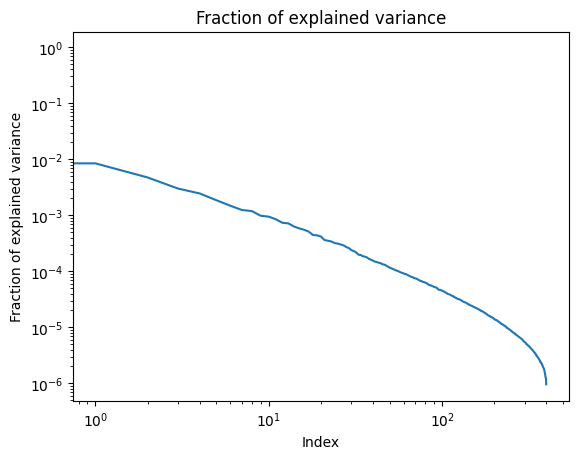

In [177]:
# trend of the fraction of "explained variance"
explained_variance = s ** 2 / np.sum(s ** 2)
plt.loglog(explained_variance)
plt.xlabel('Index')
plt.ylabel('Fraction of explained variance')
plt.title('Fraction of explained variance')
plt.show()

## 1.5

In [178]:
# 5. Implement a function computing the randomized SVD of rank k for a generic matrix.

def randomized_SVD(A, k):
    m, n = A.shape
    G = np.random.randn(n, k)
    Y = A @ G
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
    U_tilde, S, VT = np.linalg.svd(B, full_matrices=False)
    U = Q @ U_tilde
    return U, S, VT

## 1.6

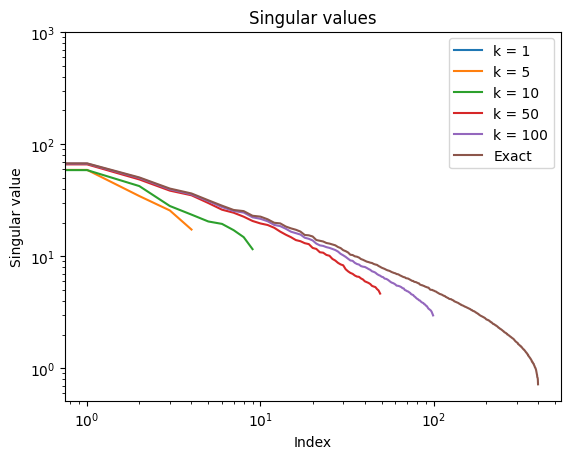

In [179]:
# 6. Set k = 1, 5, 10, 50, 100 and plot the approximated singular values together with the exact ones

k = [1, 5, 10, 50, 100]
for i in k:
    U, S, VT = randomized_SVD(X, i)
    plt.loglog(S, label='k = {}'.format(i))
plt.loglog(s, label='Exact')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.title('Singular values')
plt.show()

## 1.7

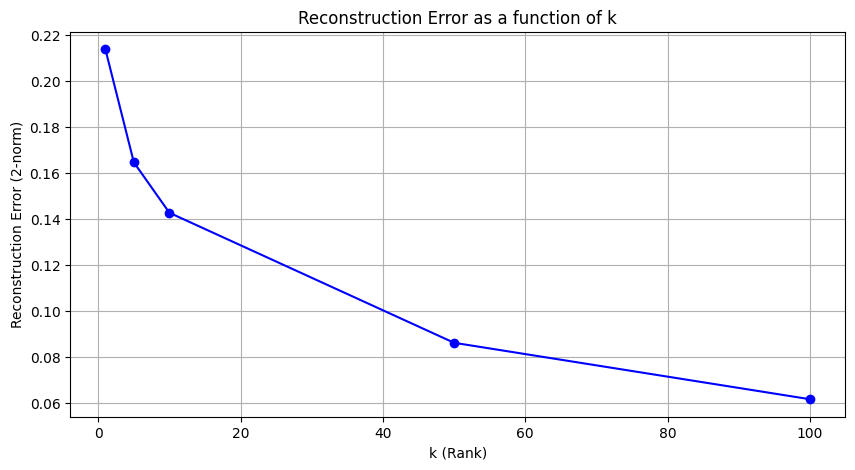

In [181]:
# 7. Use PCA to perform dimensionality reduction on the dataset of images for rank k = 1, 5, 10, 50, 100 by means of exact SVD. Compute the reconstruction error and plot it as a function of k . Comment the results.
U, s, VT = np.linalg.svd(X, full_matrices=False)

def reconstruction_error(X, k):
    X_tilde = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    return np.linalg.norm(X - X_tilde) / np.linalg.norm(X)

errors_exact = []
for i in k:
    errors_exact.append(reconstruction_error(X, i))

# Plot the reconstruction error as a function of k
plt.figure(figsize=(10, 5))
plt.plot(k, errors_exact, 'o-', color='blue')
plt.title('Reconstruction Error as a function of k')
plt.xlabel('k (Rank)')
plt.ylabel('Reconstruction Error (2-norm)')
plt.grid(True)
plt.show()



### 1.7 Comment

The results are as expected. The reconstruction error is the highest when $k=1$, that is, the lowest possible rank. As such, this matrix fails to capture the variance in the data. As $k$ increases, this error decreases sharply, which indicate that the first 10 to 20 singular values capture most of the variance in the data. As we keep on increasing $k$, the error decrease rate is slowed down, indicating an exponential decay that tends to zero. 

With this, we would choose a $k$ where the error curve starts to plateau as a good trade-off between low reconstruction error and fewer dimensions.

## 1.8

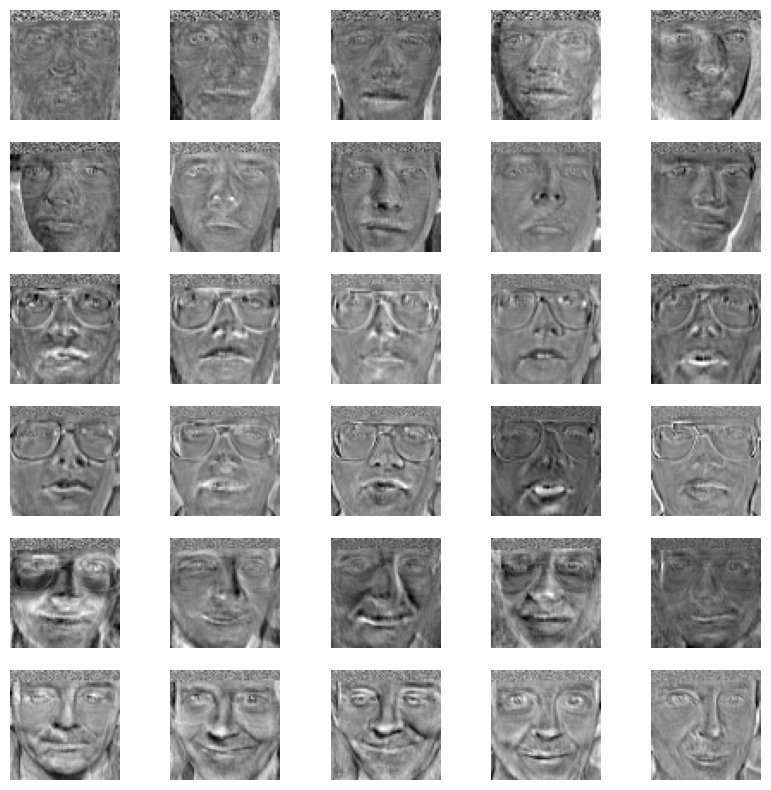

In [160]:
# 8. Visualize the first 30 principal axes.

U, s, VT = np.linalg.svd(X, full_matrices=True)

fig, axes = plt.subplots(6, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(U[i].reshape(64, 64), cmap='gray')
    ax.axis('off')
    


## 1.9

In [161]:
# 9. Compute the first two principal components related to the subset of images corresponding to labels = 0 and 39

# subset of images corresponding to labels = 0 and 39
X_0 = X[:, labels == 0]
X_39 = X[:, labels == 39]
X_subset = np.concatenate((X_0, X_39), axis=1)
y_subset = np.concatenate((np.zeros(X_0.shape[1]), np.ones(X_39.shape[1])))

X_subset.shape, X_0.shape, X_39.shape


((4096, 20), (4096, 10), (4096, 10))

In [163]:
X_subset_mean = np.mean(X_subset, axis=1)
U, s, VT = np.linalg.svd(X_subset - X_subset_mean[:, None], full_matrices=False)

x_vals, x_vals_2 = [], []
y_vals, y_vals_2 = [], []

for i in range(X_0.shape[1]):
  x = np.inner(X_subset[:, i] - X_subset_mean, U[:, 0])
  y = np.inner(X_subset[:, i] - X_subset_mean, U[:, 1])
  x_vals.append(x)
  y_vals.append(y)
  
for i in range(X_39.shape[1]):
  x = np.inner(X_subset[:, i + X_0.shape[1]] - X_subset_mean, U[:, 0])
  y = np.inner(X_subset[:, i + X_0.shape[1]] - X_subset_mean, U[:, 1])
  x_vals_2.append(x)
  y_vals_2.append(y)
  

## 1.10

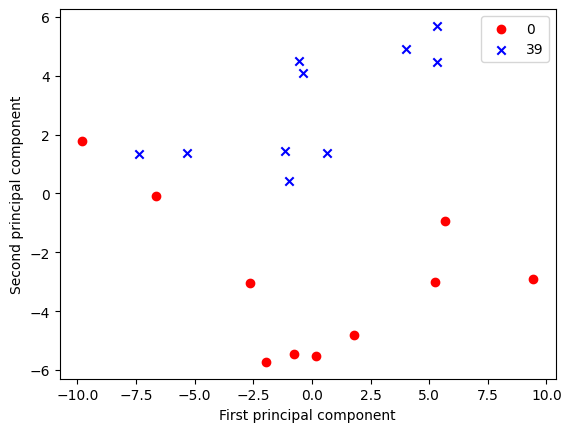

In [164]:
plt.scatter(x_vals, y_vals, marker='o', color='red', label='0')
plt.scatter(x_vals_2, y_vals_2, marker='x', color='blue', label='39')
plt.legend()
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

### 1.10 Comment

With the plot above, we can see that the two principal components clearly separate both classes. Indeed, although not linearly seperable (due to one sample of label 0 on the leftmost point in the plot), we can see that there's little to no overlap between samples of different labels. With this, we can easily conclude that the PCA successfully managed to reduce the dimensionality of the data while still being able to capture the distinctive features between classes.

# Exercise 2

## 2.1 Write the loss function for the Ridge regression.

The Ridge regression loss function is as follows:

\begin{equation}
\begin{split}
  \mathcal{L}(\textbf{w}) &= \|\textbf{y} - X\textbf{w}\|_2^2 + \lambda \|\textbf{w}\|_2^2 \\
  &= \textbf{y}^T\textbf{y} - 2\textbf{w}^TX^T\textbf{y} + \textbf{w}^TX^TX\textbf{w}
\end{split}
\end{equation}

Where:
- $\textbf{w}$ represents the weight vector
- $X$ is the feature matrix
- $\textbf{y}$ is the target vector

## 2.2 Derive the Expression of the Solution $ \textbf{w}^* $ for the Ridge Regression

The optimal weight vector $ \textbf{w}^* $ in Ridge regression is obtained by minimizing the loss function $ L(\textbf{w}) $. To find this minimum, we take the derivative of $ L(\textbf{w}) $ with respect to $\textbf{w}$ and set it to zero.

The derivative of $ L(\textbf{w}) $ with regards to $\textbf{w}$ is:

\begin{equation} 
\begin{split}
\nabla \mathcal{L}(\textbf{w}) &= -2X^T\textbf{y} + 2X^TX\textbf{w} + 2\lambda\textbf{w} \\
&= -2X^T(\textbf{y} -X\textbf{w}) + 2\lambda\textbf{w}
\end{split}
\end{equation}

Setting the derivative to 0, to find the $ \textbf{w}^* $:

\begin{equation} 
\begin{split}
\nabla \mathcal{L}(\textbf{w}) &= -2X^T(\textbf{y} -X\textbf{w}^*) + 2\lambda\textbf{w}^* = 0 \Leftrightarrow \\
&\Leftrightarrow X^T\textbf{y} = (X^TX + \lambda I) \textbf{w} ^*
\end{split}
\end{equation}

Thus, we have that:

\begin{equation}
\textbf{w} ^* = (X^TX + \lambda I)^{-1} X^T\textbf{y}
\end{equation}

## 2.3

In [165]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(55)
x = np.arange(np.pi, 3*np.pi, 0.1)
y = np.sin(x) + np.random.normal(0, 0.1, len(x))

# Generating the matrix X for polynomial regression
degree = 5
X = np.vander(x, degree + 1, increasing=True)


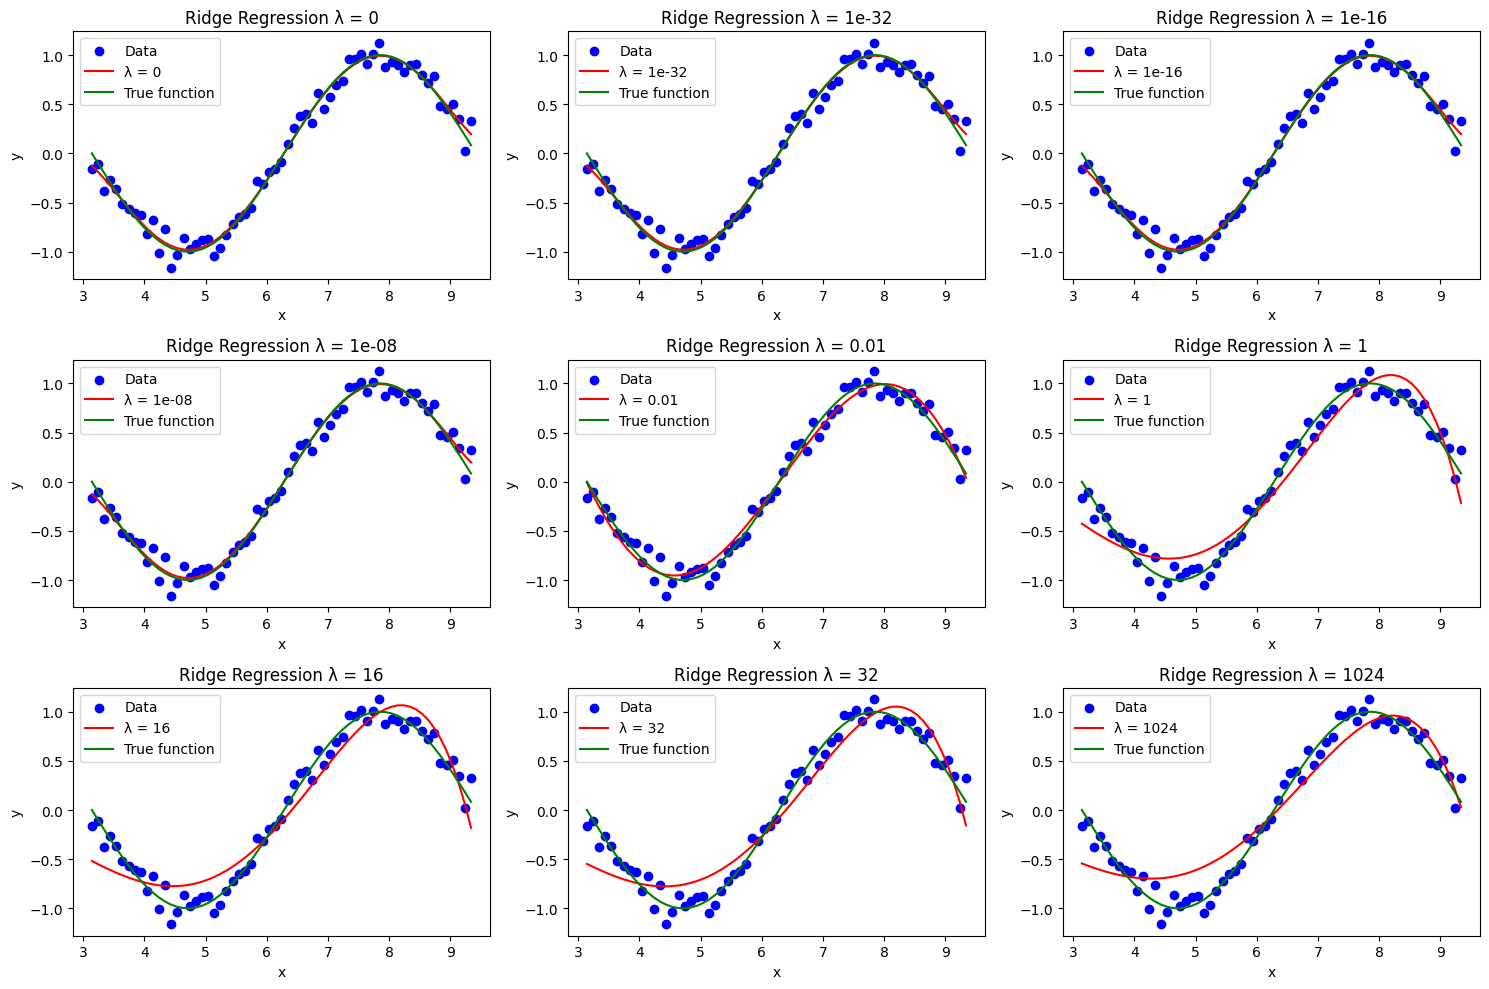

In [166]:
lambdas = [0, 10**-32, 10**-16, 10**-8, 10**-2, 1, 16, 32, 1024]

# Computing optimal weights for each lambda
weights = []
for lam in lambdas:
    regularization_term = lam * np.eye(X.shape[1])
    w_star = np.linalg.inv(X.T @ X + regularization_term) @ X.T @ y
    weights.append(w_star)

plt.figure(figsize=(15, 10))

for i, lam in enumerate(lambdas):
    plt.subplot(3, 3, i+1)
    y_pred = X @ weights[i]
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x, y_pred, label=f'λ = {lam}', color='red')
    plt.title(f'Ridge Regression λ = {lam}')
    plt.plot(x, np.sin(x), label='True function', color='green')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

### 2.3 Comment

In the example above, we can see the ridge regression of a 5 degree polynomial to the sin function, on the given domain. The resulting behaviour was the expected one.

Indeed, for little values of $\lambda$, the regression is done without any kind of regularization term - in essence, a least-squares regression was executed. As such, the data may tend to overfit to the data, which is more pronounced in the examples for $\lambda = [0, 10^{-32}, 10^{-16}, 10^{-8}]$, at the edges of the domain, where the regression fits more to the noise and, thus, is different from the true function --- fails to generalize.

On big values of $\lambda$, the regularization parameter completely takes over, which leads to an underfitting of the data itself. As $\lambda$ increases from $1$ to $1024$, we can see this effect becoming more evident, and the resulting model losing the ability to fit the data.

For $\lambda = 10^{-2}$, we can see a good trade-off: although the values in the middle of the domain may not resemble the true function as closely as the other models with less regularization do, it seems to be more smooth and capture the domain borders much better, probably indicating a better capacity at generalizing.

Finding the appropriate regularization weight is of key importance, as we could see in this example.

# Exercise 3 - on paper